# Brest Cancer Prediction

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pandas.api.types import CategoricalDtype


C:\Users\DANIEL\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv("../data/Brest_cancer_dataR2.csv")

In [12]:
df.head(100)

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
95,49,29.777778,70,8.396,1.449709,51.3387,10.731740,20.76801,602.486,2
96,44,27.887617,99,9.208,2.248594,12.6757,5.478170,23.03306,407.206,2
97,40,27.636054,103,2.432,0.617890,14.3224,6.783870,26.01360,293.123,2
98,71,27.915519,104,18.200,4.668907,53.4997,1.656020,49.24184,256.001,2


In [4]:
df.shape

(116, 10)

In [5]:
df.describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,1.551724
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,1.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474282,6.881763,269.978250,1.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,2.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,2.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,2.000000


In [6]:
df.isna().sum()

Age               0
BMI               0
Glucose           0
Insulin           0
HOMA              0
Leptin            0
Adiponectin       0
Resistin          0
MCP.1             0
Classification    0
dtype: int64

In [8]:
df2 = df.copy()
df2['Classification'] = df2['Classification'].astype('category')

C:\Users\DANIEL\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\DANIEL\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\DANIEL\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\DANIEL\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


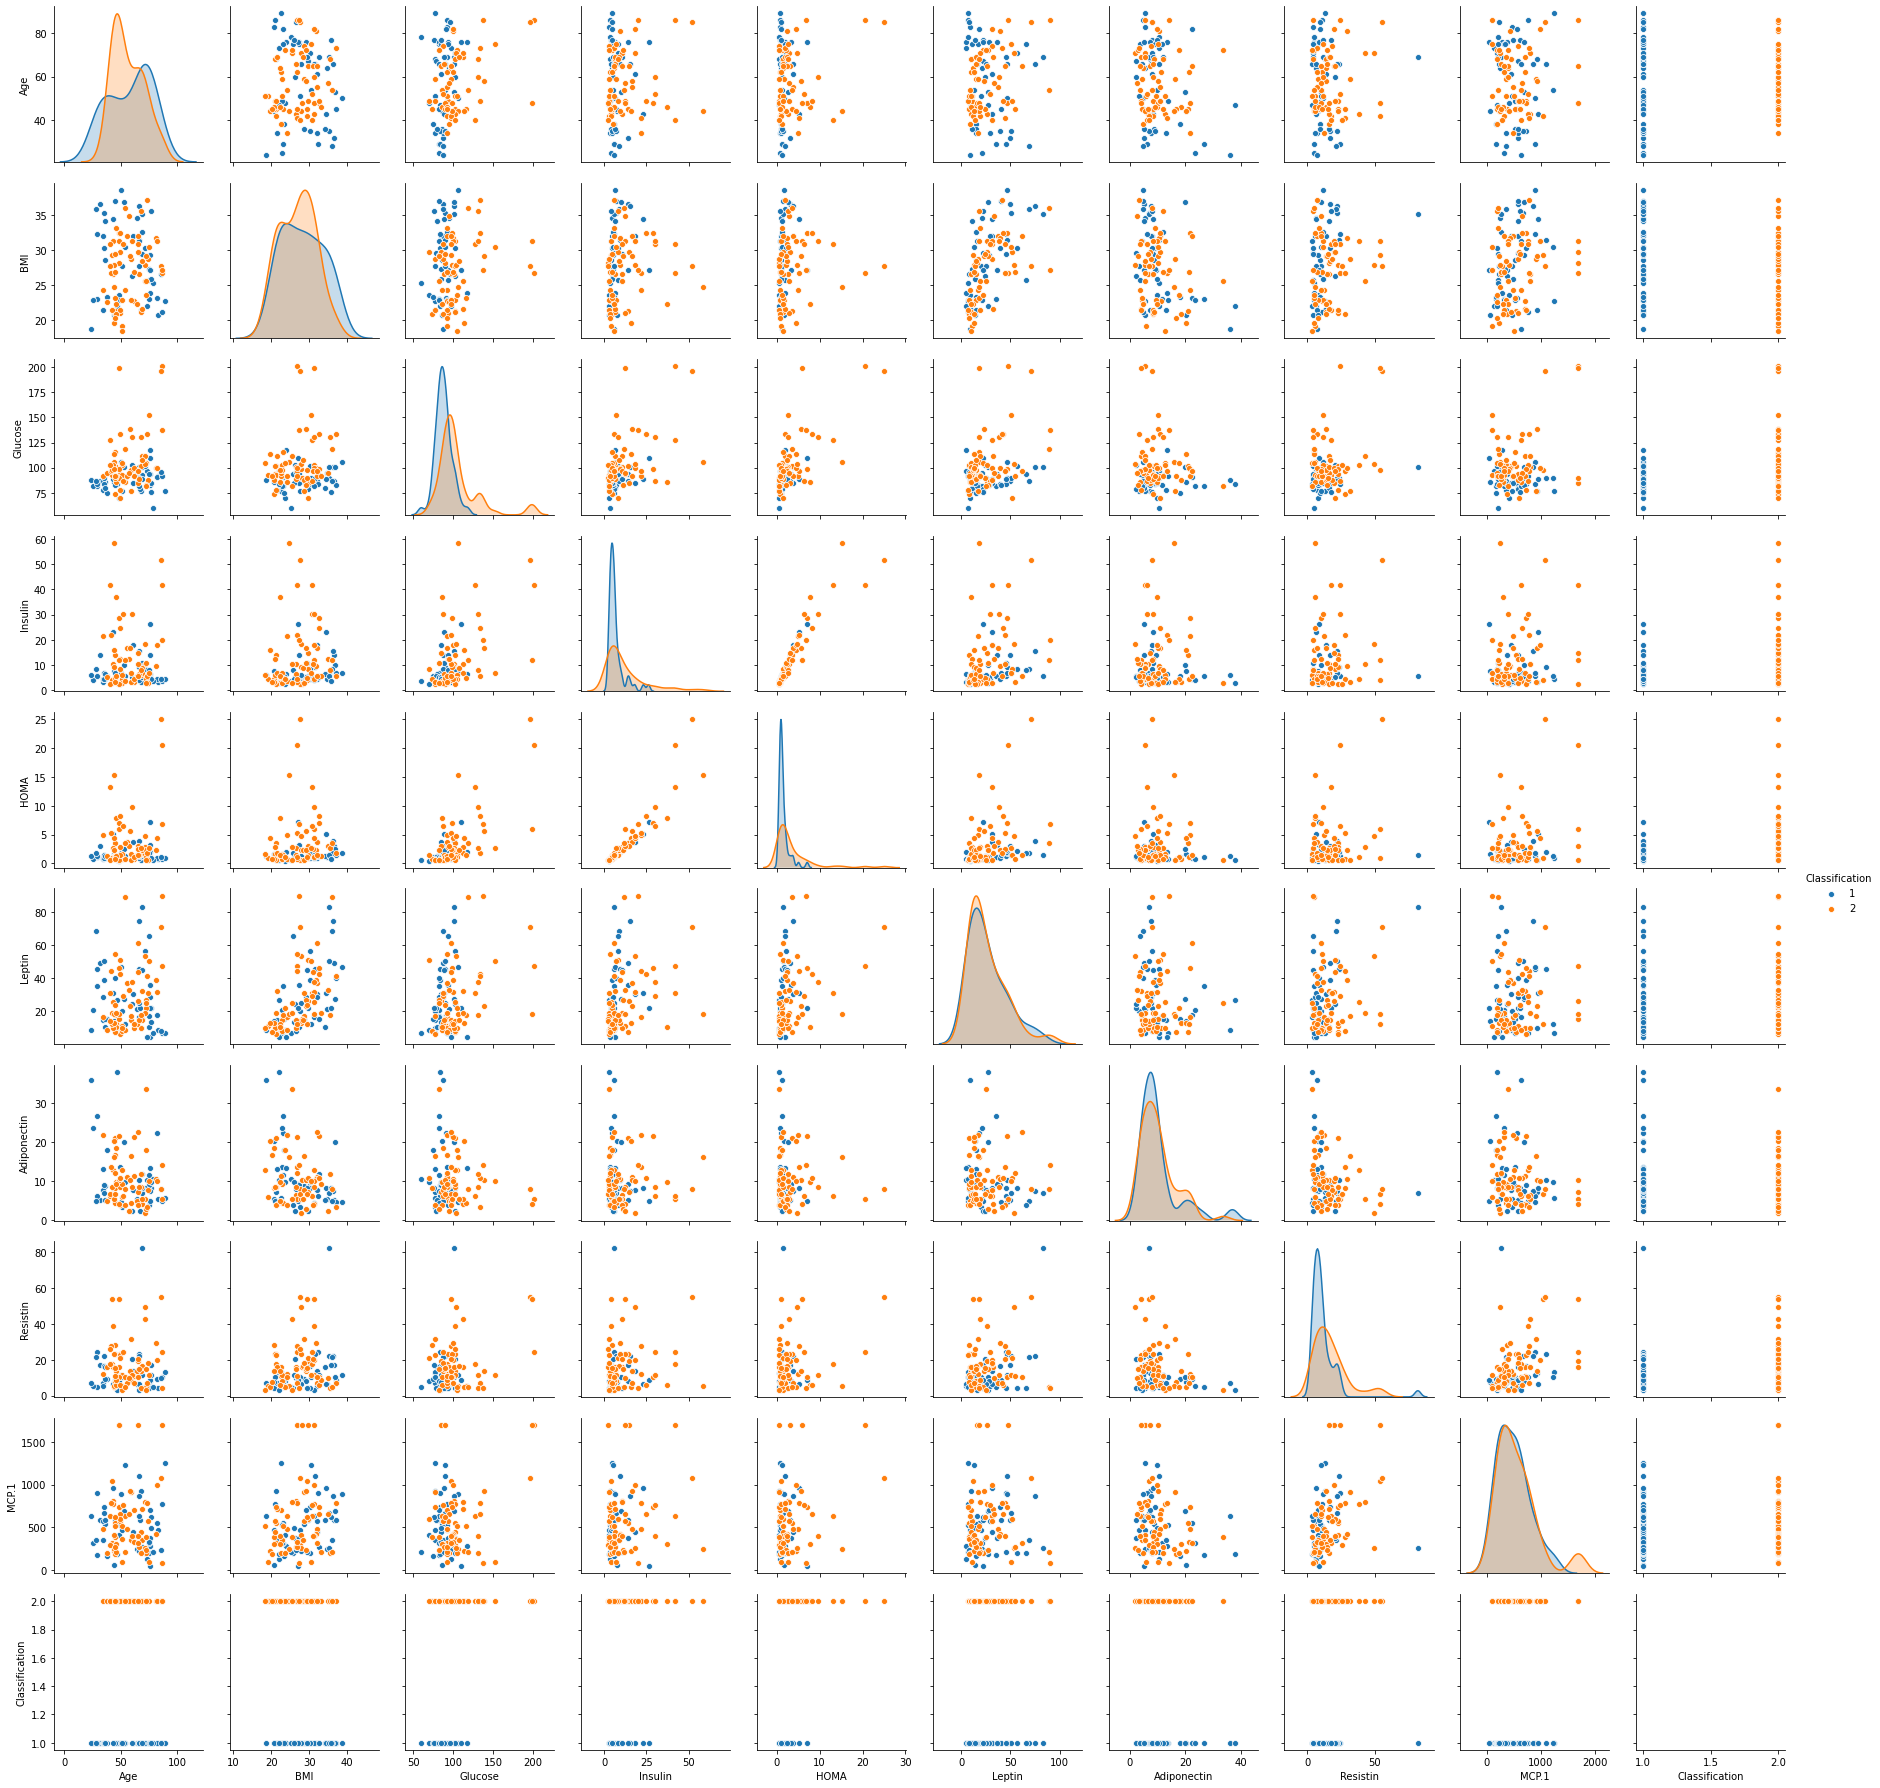

In [9]:
sns.pairplot(df2,hue="Classification")

## k-means

In [13]:
from sklearn.cluster import KMeans

In [15]:
wcss = []
for i in range(2, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df.iloc[:,0:8])
    wcss.append(kmeans.inertia_)
    

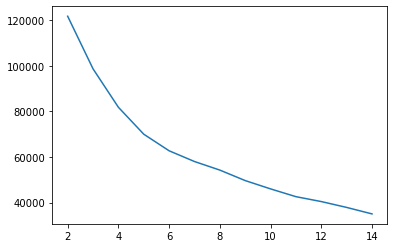

In [16]:
sns.lineplot(x=range(2, 15), y=wcss)

In [17]:
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(df.iloc[:,0:8])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [18]:
df2['cluster'] = kmeans.labels_

In [21]:
df2.head(100)

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification,cluster
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1,0
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1,0
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1,0
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1,0
...,...,...,...,...,...,...,...,...,...,...,...
95,49,29.777778,70,8.396,1.449709,51.3387,10.731740,20.76801,602.486,2,3
96,44,27.887617,99,9.208,2.248594,12.6757,5.478170,23.03306,407.206,2,1
97,40,27.636054,103,2.432,0.617890,14.3224,6.783870,26.01360,293.123,2,1
98,71,27.915519,104,18.200,4.668907,53.4997,1.656020,49.24184,256.001,2,2


C:\Users\DANIEL\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\DANIEL\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\DANIEL\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\DANIEL\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\DANIEL\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\DANIEL\Anaconda3\lib\site-packages\statsmod

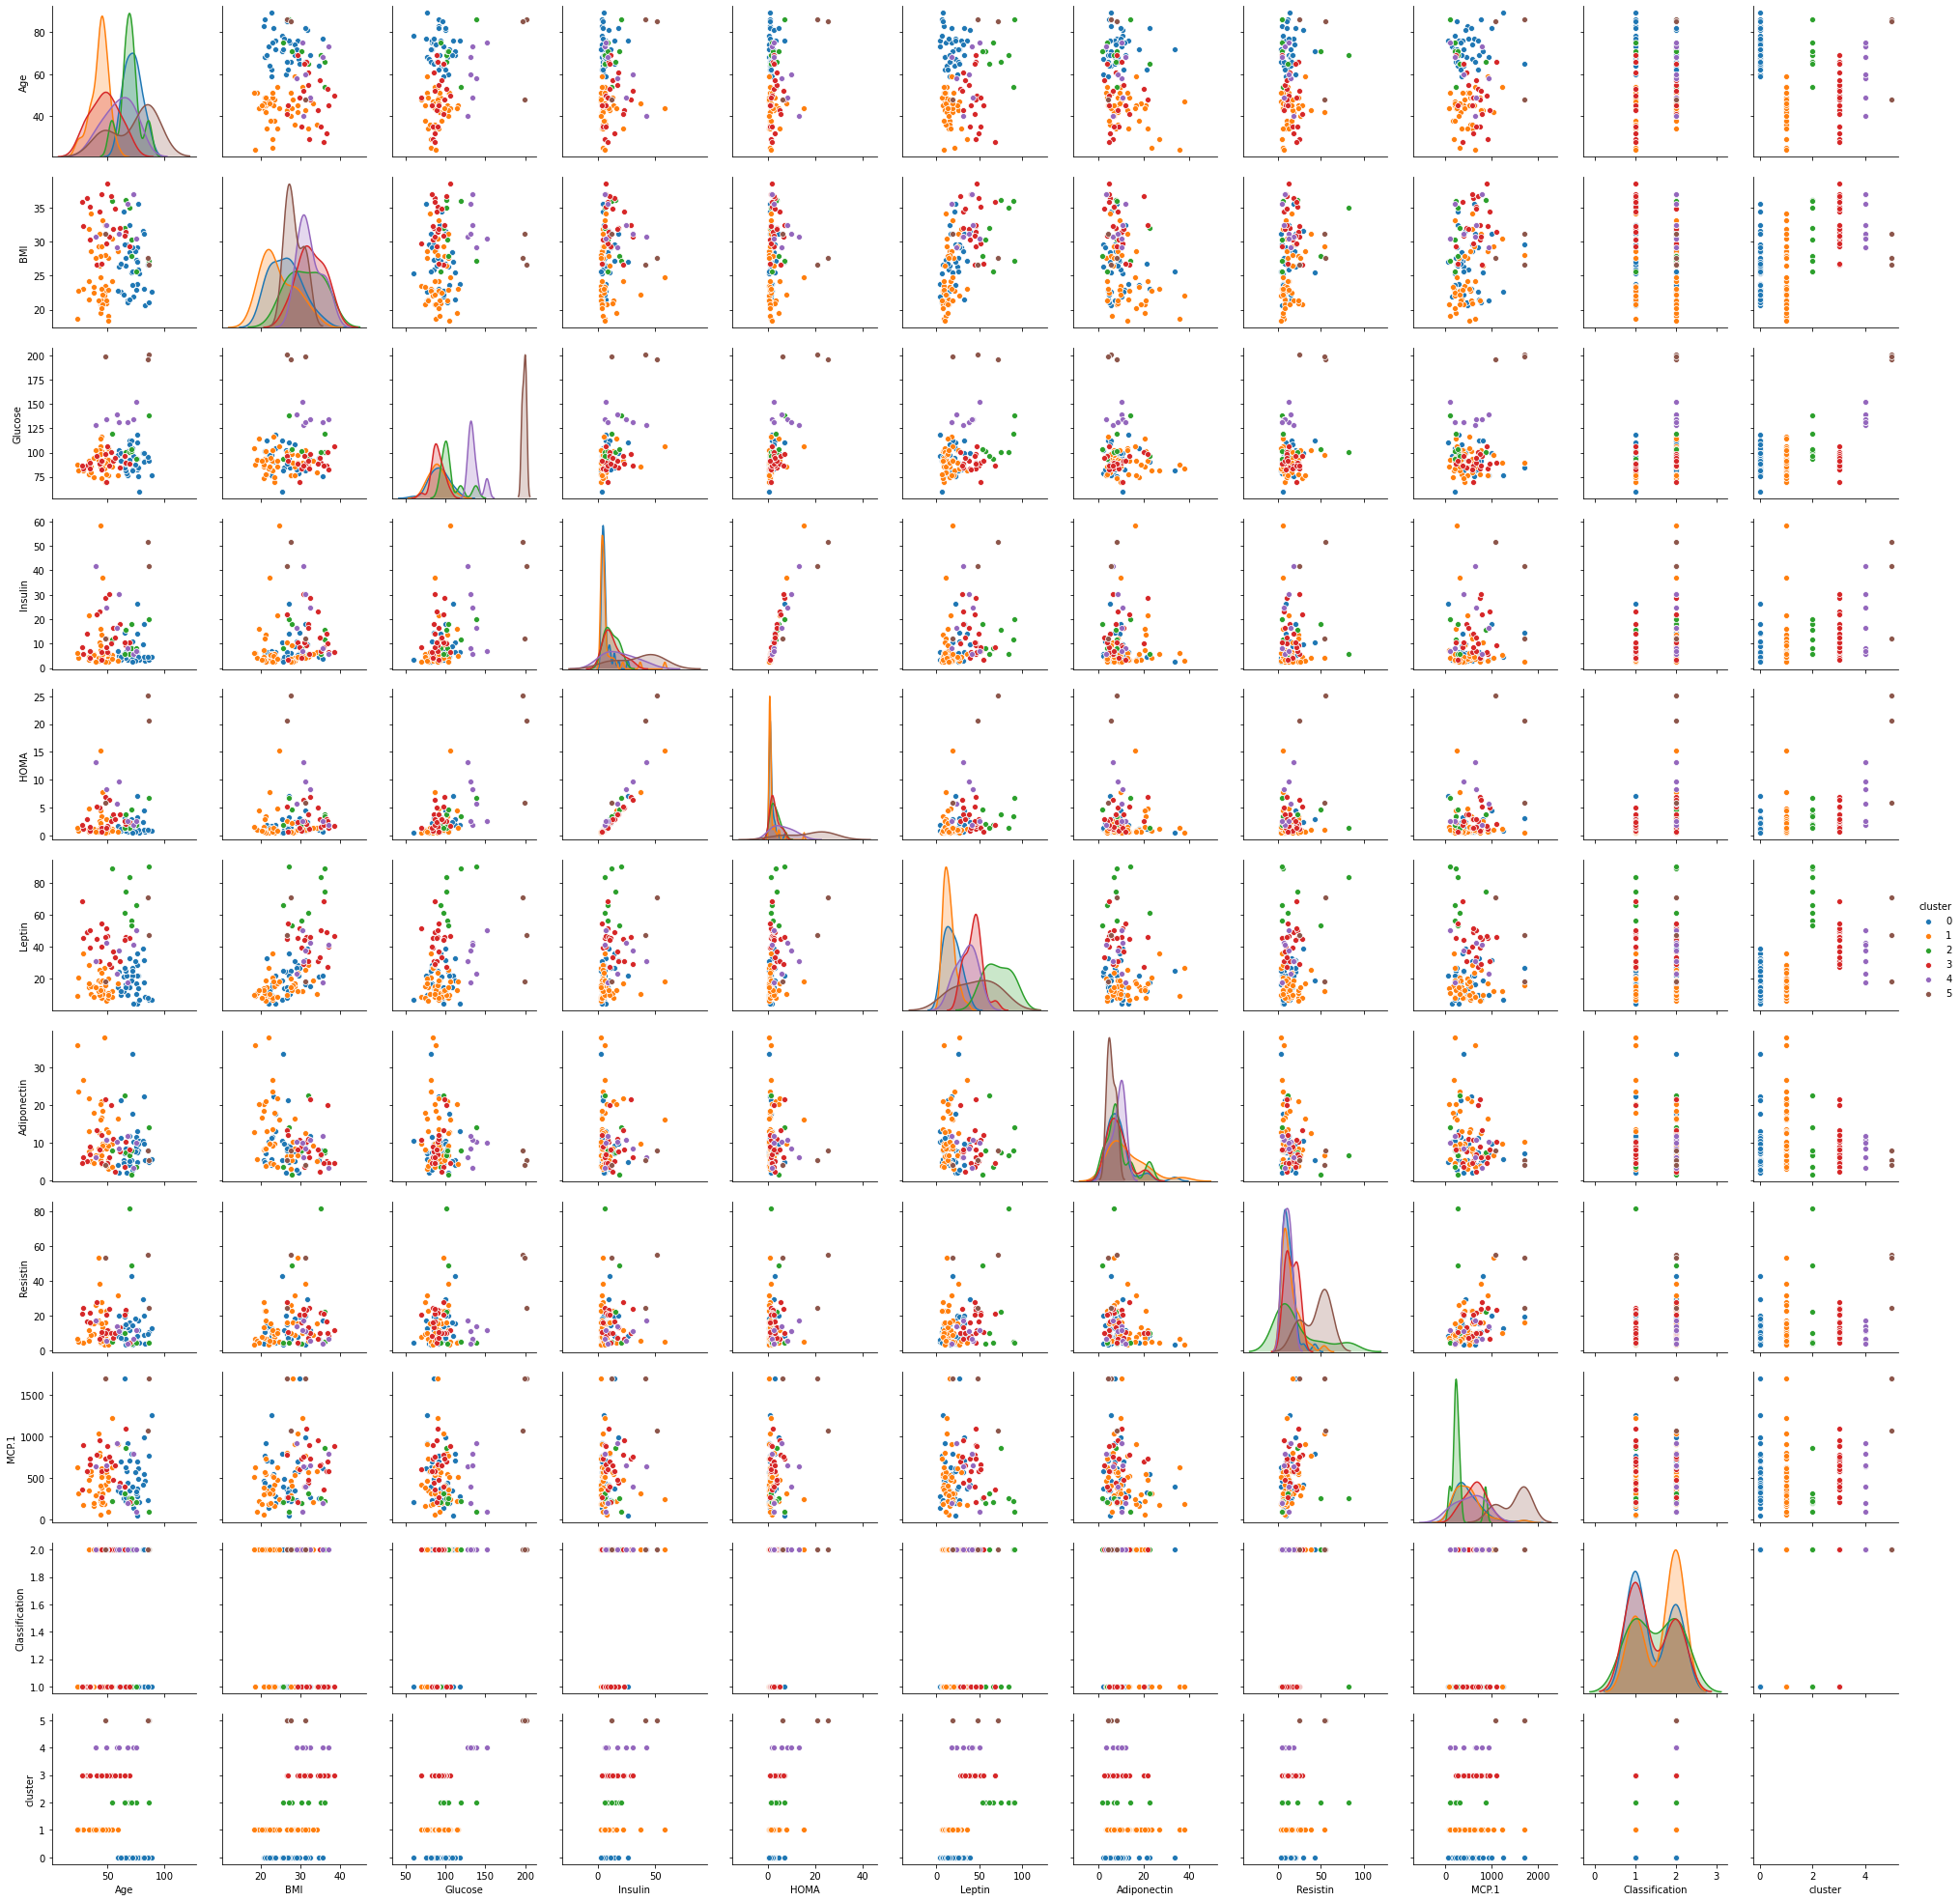

In [20]:
sns.pairplot(df2,hue="cluster")

In [22]:
pd.crosstab(df2.cluster,df2.Classification)

Classification,1,2
cluster,,
0,22,16
1,14,26
2,4,4
3,12,8
4,0,7
5,0,3


In [23]:
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree, fcluster

In [24]:
linked = linkage(df.iloc[:,0:8], 'ward')

labelList = range(2, 15)

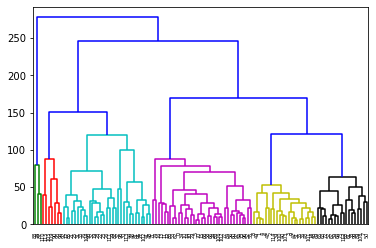

In [25]:
dn = dendrogram(linked,color_threshold=120)


In [26]:
df2['hcluster'] = fcluster(linked, 6, criterion='maxclust')

In [28]:
df2.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification,cluster,hcluster
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1,1,4
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1,0,5
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1,0,5
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1,0,5
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1,0,5


In [29]:
pd.crosstab(df2.hcluster,df2.Classification)

Classification,1,2
hcluster,,
1,0,3
2,0,7
3,18,13
4,13,22
5,18,4
6,3,15


In [30]:
pd.crosstab(df2.cluster,df2.hcluster)

hcluster,1,2,3,4,5,6
cluster,,,,,,
0,0,0,4,0,22,12
1,0,0,1,35,0,4
2,0,2,6,0,0,0
3,0,0,20,0,0,0
4,0,5,0,0,0,2
5,3,0,0,0,0,0


In [31]:
df2.describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,cluster,hcluster
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,1.370690,4.034483
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,1.386457,1.250607
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,0.000000,1.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474282,6.881763,269.978250,0.000000,3.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,1.000000,4.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,3.000000,5.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,5.000000,6.000000


In [32]:
df2.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification,cluster,hcluster
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1,1,4
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1,0,5
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1,0,5
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1,0,5
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1,0,5


# Partition of the data

In [33]:
from sklearn.model_selection import train_test_split

In [35]:
nv = ['Age','BMI','Glucose','Insulin','HOMA','Leptin','Adiponectin','Resistin','MCP.1']
nc = ['cluster','hcluster']
yv = 'Classification'

In [36]:
X = df2.loc[:,nv]
y = df2.Classification

In [37]:
X.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920


In [38]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Classification, dtype: category
Categories (2, int64): [1, 2]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.40,random_state=4)


# Models

### Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
mod1 = LogisticRegression()
mod1.fit(X_train,y_train)

C:\Users\DANIEL\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
yhat1 = mod1.predict(X_train)
yhat1

array([1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1,
       2, 2, 1], dtype=int64)

In [43]:
yprob1 = mod1.predict_proba(X_train)
yprob1

array([[6.10902872e-01, 3.89097128e-01],
       [2.96257746e-01, 7.03742254e-01],
       [3.35030131e-01, 6.64969869e-01],
       [2.88006836e-01, 7.11993164e-01],
       [1.87195233e-01, 8.12804767e-01],
       [6.61472966e-01, 3.38527034e-01],
       [8.57218168e-01, 1.42781832e-01],
       [6.99482833e-01, 3.00517167e-01],
       [2.19534006e-01, 7.80465994e-01],
       [1.64928808e-07, 9.99999835e-01],
       [3.30370942e-02, 9.66962906e-01],
       [9.02512795e-01, 9.74872046e-02],
       [6.19609487e-01, 3.80390513e-01],
       [8.65384653e-03, 9.91346153e-01],
       [3.16305072e-06, 9.99996837e-01],
       [2.26293017e-01, 7.73706983e-01],
       [4.31933923e-01, 5.68066077e-01],
       [1.33468972e-01, 8.66531028e-01],
       [1.59521048e-01, 8.40478952e-01],
       [2.99824702e-01, 7.00175298e-01],
       [4.60911187e-01, 5.39088813e-01],
       [8.57352729e-01, 1.42647271e-01],
       [3.17272452e-01, 6.82727548e-01],
       [6.81459022e-01, 3.18540978e-01],
       [2.353355

In [44]:
pd.crosstab(y_train,yhat1)

col_0,1,2
Classification,,
1,19,11
2,7,32


In [45]:
### Accuracy:
mod1.score(X_train,y_train)

0.7391304347826086

In [46]:
yhat2 = mod1.predict(X_test)
print(mod1.score(X_test,y_test))
pd.crosstab(y_test,yhat2)

0.7446808510638298


col_0,1,2
Classification,,
1,13,9
2,3,22


In [47]:
### AUC
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_train, yhat1))
print(roc_auc_score(y_test, yhat2))

0.7269230769230769
0.7354545454545454


In [48]:
res = {1:{'model':'Logistic Regression - base model',
           'accuracy-Train':mod1.score(X_train,y_train),
           'accuracy-Test':mod1.score(X_test,y_test),
           'AUC-train':roc_auc_score(y_train, yhat1),
           'AUC-test':roc_auc_score(y_test, yhat2)
      }}

In [46]:
#res[2] = {'model':'Logistic Regression - base model',
#           'accuracy-Train':mod1.score(X_train,y_train),
#           'accuracy-Test':mod1.score(X_test,y_test),
#           'AUC-train':roc_auc_score(y_train, yhat1),
#           'AUC-test':roc_auc_score(y_test, yhat2)
#      }

In [49]:
res

{1: {'model': 'Logistic Regression - base model',
  'accuracy-Train': 0.7391304347826086,
  'accuracy-Test': 0.7446808510638298,
  'AUC-train': 0.7269230769230769,
  'AUC-test': 0.7354545454545454}}

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
mod2 = RandomForestClassifier(n_estimators=10, max_depth=2, random_state=2).fit(X_train,y_train)

In [52]:
yhat1 = mod2.predict(X_train)
yhat1

array([2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1,
       2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1,
       2, 2, 1], dtype=int64)

In [53]:
yprob1 = mod2.predict_proba(X_train)
yprob1

array([[0.29659373, 0.70340627],
       [0.57179154, 0.42820846],
       [0.30988973, 0.69011027],
       [0.38550512, 0.61449488],
       [0.35935167, 0.64064833],
       [0.6429418 , 0.3570582 ],
       [0.63516994, 0.36483006],
       [0.41796278, 0.58203722],
       [0.73481376, 0.26518624],
       [0.25957919, 0.74042081],
       [0.31021278, 0.68978722],
       [0.61757275, 0.38242725],
       [0.6429418 , 0.3570582 ],
       [0.23295148, 0.76704852],
       [0.18811196, 0.81188804],
       [0.25160167, 0.74839833],
       [0.44617063, 0.55382937],
       [0.45427918, 0.54572082],
       [0.23798262, 0.76201738],
       [0.56109127, 0.43890873],
       [0.40606463, 0.59393537],
       [0.52292217, 0.47707783],
       [0.47196278, 0.52803722],
       [0.3262761 , 0.6737239 ],
       [0.32256181, 0.67743819],
       [0.40462944, 0.59537056],
       [0.5163943 , 0.4836057 ],
       [0.65766414, 0.34233586],
       [0.40557641, 0.59442359],
       [0.55518023, 0.44481977],
       [0.

In [54]:
pd.crosstab(y_train,yhat1)

col_0,1,2
Classification,,
1,22,8
2,3,36


In [55]:
### Accuracy:
mod2.score(X_train,y_train)

0.8405797101449275

In [56]:
yhat2 = mod1.predict(X_test)
print(mod1.score(X_test,y_test))
pd.crosstab(y_test,yhat2)

0.7446808510638298


col_0,1,2
Classification,,
1,13,9
2,3,22
